In [1]:
import pickle
import seaborn as sn
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
with open('./train/ppo2_1_raw_data_disc_0_by_polina_training_11Dec_14:53.pickle', 'rb') as f:
    data = pickle.load(f)

In [19]:
data.keys()
df = pd.DataFrame(data, index=range(len(data['timestep'])))

dict_keys(['success', 'timestep', 'time_exceeded'])

In [21]:
df[df['time_exceeded'] == 1]

,success,timestep,time_exceeded
24,0,3557,1
29,0,4162,1
30,0,4305,1
35,0,5074,1
50,0,6259,1
53,0,6449,1
54,0,6508,1
55,0,6533,1
62,0,7596,1
78,0,9060,1


In [7]:
def calc_success_rate(df, i_step):
    df_cutted = df.iloc[:i_step + 1]
    return (len(df_cutted[df_cutted['success'] == 1]) - len(df_cutted[df_cutted['success'] != 1])) / (len(df_cutted[df_cutted['success'] == 1]) + len(df_cutted[df_cutted['success'] != 1]))

In [22]:
def calc_timeexceeded_rate(df, i_step):
    df_cutted = df.iloc[:i_step + 1]
    return (len(df_cutted[df_cutted['time_exceeded'] == 0]) - len(df_cutted[df_cutted['time_exceeded'] == 1])) / (len(df_cutted[df_cutted['time_exceeded'] == 0]) + len(df_cutted[df_cutted['time_exceeded'] == 1]))

In [23]:
df['success_rate'] = 1
df['time_exceeded_rate'] = 1
for i in range(len(df['timestep'])):
    df.loc[i, 'success_rate'] = calc_success_rate(df, i)
    df.loc[i, 'time_exceeded_rate'] = calc_timeexceeded_rate(df, i)
df

,success,timestep,time_exceeded,success_rate,time_exceeded_rate
0,-1,24,0,-1,1.000000
1,-1,368,0,-1,1.000000
2,-1,463,0,-1,1.000000
3,-1,466,0,-1,1.000000
4,-1,920,0,-1,1.000000
...,...,...,...,...,...
80,-1,9265,0,-1,0.753086
81,-1,9315,0,-1,0.756098
82,0,9333,1,-1,0.734940
83,-1,9419,0,-1,0.738095


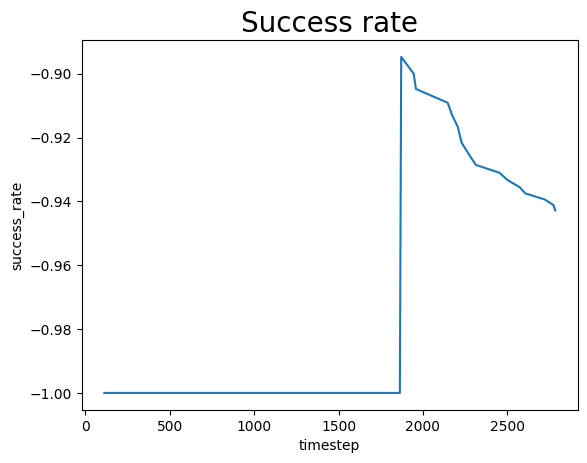

In [102]:
sn.lineplot(
    x='timestep', 
    y='success_rate', 
    # errorbar='sd',
    data=df, 
    # kind='line',
    # err_style="band"
    )
plt.title('Success rate', size=20, color='black')
plt.show()
plt.close();

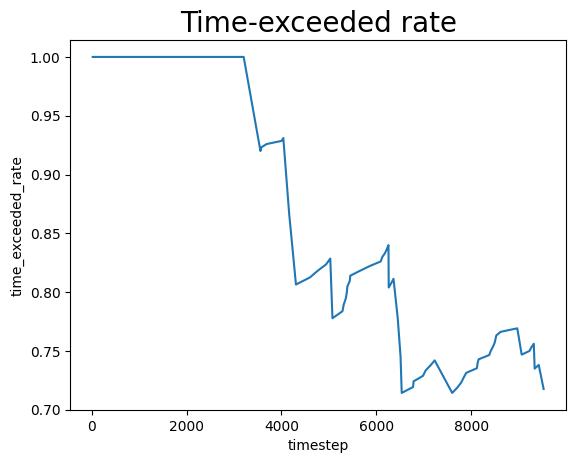

In [24]:
sn.lineplot(
    x='timestep', 
    y='time_exceeded_rate', 
    # errorbar='sd',
    data=df, 
    # kind='line',
    # err_style="band"
    )
plt.title('Time-exceeded rate', size=20, color='black')
plt.show()
plt.close();

In [42]:
x = np.arange(0,10, 1, float)
y = np.arange(0,10, 1, float)
y = y[:,np.newaxis]
y.shape

(10, 1)

In [45]:
def makeGaussian2(x_center=0, y_center=0, theta=0, sigma_x = 10, sigma_y=10, x_size=480, y_size=480):
    # x_center and y_center will be the center of the gaussian, theta will be the rotation angle
    # sigma_x and sigma_y will be the stdevs in the x and y axis before rotation
    # x_size and y_size give the size of the frame 
    A = 255
    theta = 2*np.pi*theta/360
    x = np.arange(0,x_size, 1, float)
    y = np.arange(0,y_size, 1, float)
    y = y[:,np.newaxis]
    sx = sigma_x
    sy = sigma_y
    x0 = x_center
    y0 = y_center

    # rotation
    a=np.cos(theta)*x -np.sin(theta)*y
    b=np.sin(theta)*x +np.cos(theta)*y
    a0=np.cos(theta)*x0 -np.sin(theta)*y0
    b0=np.sin(theta)*x0 +np.cos(theta)*y0

    return A * np.exp(-(((a-a0)**2)/(2*(sx**2)) + ((b-b0)**2) /(2*(sy**2))))

In [46]:
s = makeGaussian2(5, 5, 0, 0.25, 0.2, 10, 10)
s

array([[6.77046044e-221, 1.25840635e-189, 2.63215760e-165,
        6.19571118e-148, 1.64118950e-137, 4.89231696e-134,
        1.64118950e-137, 6.19571118e-148, 2.63215760e-165,
        1.25840635e-189],
       [4.88368247e-172, 9.07716262e-141, 1.89863334e-116,
        4.46910315e-099, 1.18382619e-088, 3.52893614e-085,
        1.18382619e-088, 4.46910315e-099, 1.89863334e-116,
        9.07716262e-141],
       [4.89231696e-134, 9.09321129e-103, 1.90199018e-078,
        4.47700465e-061, 1.18591923e-050, 3.53517540e-047,
        1.18591923e-050, 4.47700465e-061, 1.90199018e-078,
        9.09321129e-103],
       [6.80643505e-107, 1.26509285e-075, 2.64614348e-051,
        6.22863188e-034, 1.64990991e-023, 4.91831211e-020,
        1.64990991e-023, 6.22863188e-034, 2.64614348e-051,
        1.26509285e-075],
       [1.31511211e-090, 2.44436172e-059, 5.11277239e-035,
        1.20347129e-017, 3.18788981e-007, 9.50296559e-004,
        3.18788981e-007, 1.20347129e-017, 5.11277239e-035,
        2.4

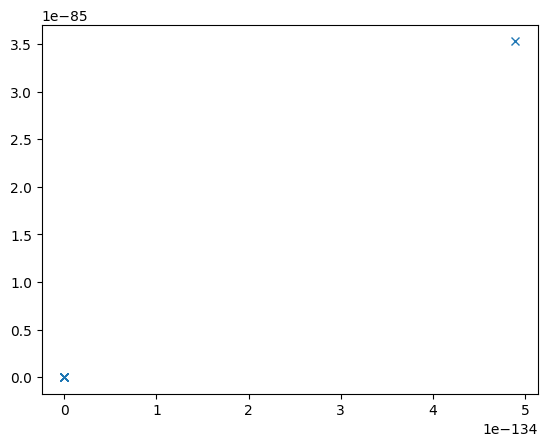

In [47]:
plt.plot(s[0], s[1], 'x')

In [14]:
import numpy as np

def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [11]:
s = makeGaussian2()

In [12]:
s.shape

(480, 480)

In [15]:
m = makeGaussian(200)

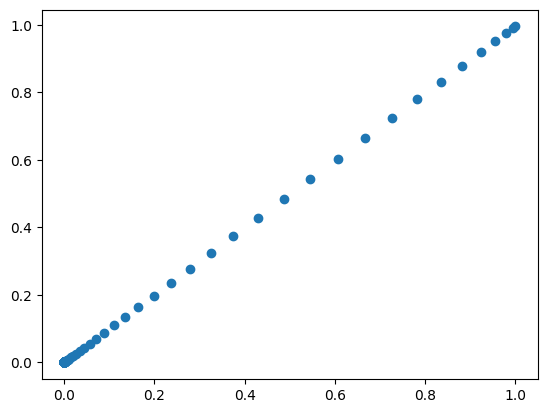

In [13]:
plt.scatter(s[0], s[1])

In [16]:
m.shape

(200, 200)

In [33]:
m

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

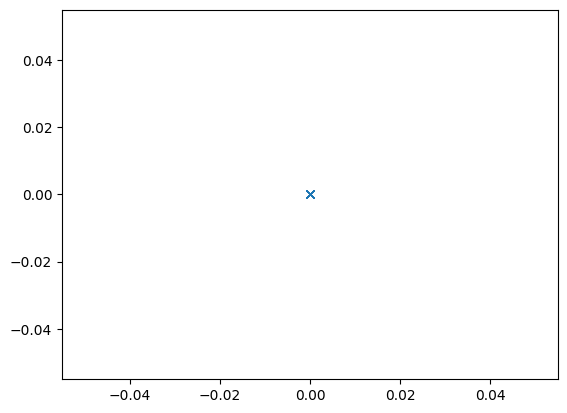

In [32]:
plt.plot(m[0], m[1], 'x')

In [31]:
np.unique(m)

array([0.00000000e+000, 4.94065646e-224, 3.45845952e-223, 1.72922976e-222,
       2.32210854e-222, 4.29837112e-222, 5.87938119e-222, 6.88233445e-221,
       2.36064566e-220, 5.94855038e-220, 8.09477154e-220, 1.10151936e-219,
       2.77566080e-219, 6.99428972e-219, 9.51773001e-219, 4.44108198e-218,
       1.52283730e-217, 9.66941310e-217, 4.51186039e-216, 1.54710607e-215,
       5.30498948e-215, 2.47536971e-214, 6.23754081e-214, 8.48798316e-214,
       2.91050900e-213, 7.33402310e-213, 1.84805802e-212, 2.51481887e-212,
       4.02371019e-211, 2.55489672e-210, 3.47667790e-210, 4.73102853e-210,
       1.19214449e-209, 1.62225829e-209, 3.00401586e-209, 4.08783475e-209,
       5.56268465e-209, 4.80642538e-208, 1.64811169e-207, 4.15298123e-207,
       1.93782928e-206, 6.64476997e-206, 3.10052685e-205, 7.81283810e-205,
       2.67900338e-204, 4.28640541e-203, 7.93734875e-203, 1.08010648e-202,
       9.33263619e-202, 1.26997580e-201, 1.72817037e-201, 4.35471645e-201,
       5.12022158e-200, 1

In [30]:
m *= 1e100

(-2.055751481811705,
 2.380244996352379,
 -1.9625473244794707,
 1.9292940228470687)

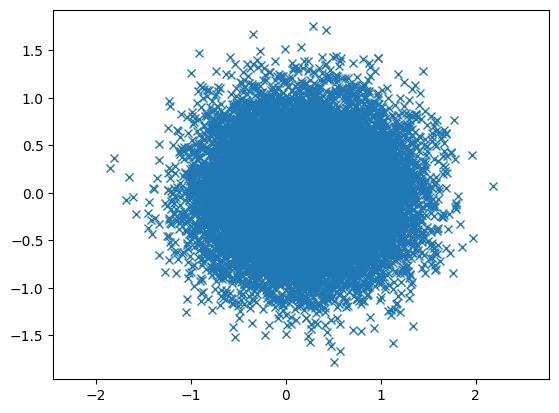

In [76]:
mean = [0.2, 0.0]

cov = [[0.25, 0], [0, 0.2]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 20000).T

plt.plot(x, y, 'x')

plt.axis('equal')

plt.show()

In [74]:
x

array([-6.11191355,  4.14917622, -1.96470968, ...,  4.01980412,
        1.71052314, -4.516118  ])

In [75]:
y

array([13.6509615 ,  2.2842783 , 13.39100091, ..., -1.69735878,
       -6.80790114, -1.226276  ])

In [59]:
a = np.array([0.25, 0.5])
a = a[np.newaxis, :]
a.shape

(1, 2)

In [62]:
np.repeat(a, 10, axis=0)

array([[0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ],
       [0.25, 0.5 ]])

AttributeError: 'GaussianMixture' object has no attribute 'covariances_'

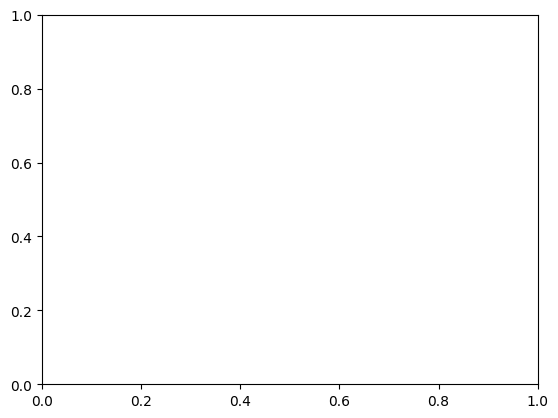

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

colors = ["navy", "turquoise", "darkorange"]


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        covariances = np.diag(gmm.covariances_[n][:2])
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


estimator = GaussianMixture(
        n_components=2, covariance_type='diag', max_iter=20, random_state=0
    )
a = np.array([0.25, 0.5])
a = a[np.newaxis, :]
estimator.means_init = np.repeat(a, 10, axis=0)

h = plt.subplot(1, 1, 1)
make_ellipses(estimator, h)

In [64]:
estimator = GaussianMixture(
        n_components=2, covariance_type='diag', max_iter=20, random_state=0
    )


In [70]:
a = np.array([0.25, 0.5])
a = a[np.newaxis, :]
estimator.means_init = np.repeat(a, 10, axis=0)
estimator.covars_

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

In [71]:
import sklearn

In [72]:
sklearn.__version__

'1.1.2'

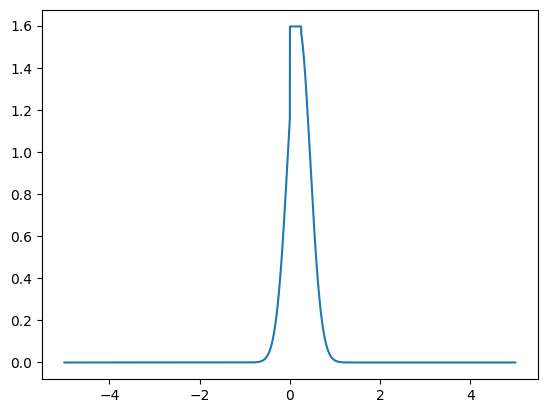

In [90]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
## generate the data and plot it for an ideal normal curve

## x-axis for the plot
x_data = np.arange(-5, 5, 0.001)

## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, 0.2, 0.25)
mask = np.logical_and((x_data > 0.0), (x_data < 0.25))
y_data[mask] = np.max(y_data)
# y_data[y_data >= 0 and y_data <= 0.2] = np.max(y_data)

## plot data
plt.plot(x_data, y_data)

In [89]:
x_data.shape

(10000,)

(10000,)

In [141]:
num = -4.8
np.logical_and(b >= (num - 0.001), b <= (num + 0.001))

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [145]:
b = np.arange(-5, 5, 0.1, dtype=float)
num = -4.8
mask = np.logical_and(b >= (num - 0.001), b <= (num + 0.001))
b[mask]
np.where(np.logical_and(b >= (num - 0.001), b <= (num + 0.001)))[0][0]
b

array([-4.8])

2

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [153]:
def get_error(coord, offset, sigma, safe_radius):
    if coord < -5 or coord > 5:
        return 0
    x_data = np.arange(-5, 5, 0.01)

    ## y-axis as the gaussian
    y_data = stats.norm.pdf(x_data, offset, sigma)
    mask = np.logical_and((x_data >= 0.0), (x_data <= safe_radius))
    y_data[mask] = np.max(y_data)
    r = round(coord, 2)
    ind = np.where(np.logical_and(x_data >= (r - 0.001), x_data <= (r + 0.001)))[0][0]
    return y_data[ind]

In [164]:
def get_punish(ped_pos, robot_pos):
    s_x = 0.25
    s_y = 0.2
    r0 = 0.25
    offset_x = 0.2
    offset_y = 0
    A = 1

    x_punish = get_error(ped_pos[0] - robot_pos[0], offset_x, s_x, r0)
    y_punish = get_error(ped_pos[1] - robot_pos[1], offset_y, s_y, r0)

    return - A * np.sqrt(x_punish ** 2 + y_punish ** 2)
    # return np.exp(((x_punish ** 2 )/s_x ** 2) + (y_punish ** 2)/(s_y ** 2))


    # gauss = np.exp(-(((ped_pos[0] - robot_pos[0])  ** 2) / (2 * (s_x ** 2)) + ((ped_pos[1] - robot_pos[1]) ** 2) / (2 * (s_y ** 2))))
    # gauss2 = np.exp(-((x_punish[]) + ()))
    # return x_punish, y_punish, gauss

    ## plot data

In [163]:
res = get_punish((23, 28), (22.9, 29.1))
res

-1.5957691216058216